In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("home_prices_bgl.xlsx")
df.sample(5)

,area,bedrooms,price
4,1200,2,51.0
2,1440,3,62.0
16,1180,3,48.0
10,1800,3,82.0
11,2785,4,140.0


In [3]:
feat = df.drop("price",axis=1)
label = df[['price']]

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmax_feat = MinMaxScaler()
minmax_label = MinMaxScaler()

scaled_x = minmax_feat.fit_transform(feat)
scaled_x


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = minmax_label.fit_transform(label)

In [6]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
def batch_gd(x,y,epochs,learning_rate = 0.01):
    
    cost_list = []
    epoch_list = []
    
    features = x.shape[1]
    samples = x.shape[0]
    
    w = np.ones(shape = features)
    b = 0
    
    for i in range(epochs):
        y_pred = np.dot(w,x.T)+b
        
        w_grad = -(2/samples)*(x.T.dot(y - y_pred ))
        b_grad = -(2/samples) * np.sum(y-y_pred)
        
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y - y_pred))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list
            
    

In [8]:
w,b,cost,cost_list,epoch_list = batch_gd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

In [9]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

(array([0.58391186, 0.37901352]), -1.2865831562132901, 0.008501492548236424)

w1,w2,bias,cost_function

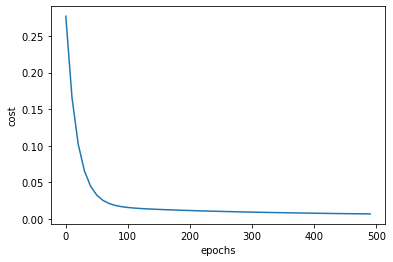

In [10]:
plt.xlabel("epochs")
plt.ylabel("cost")

plt.plot(epoch_list,cost_list)

In [13]:
w[0]

0.707124642770257

In [41]:
def predict(area,rooms,w,b):
    scaled_x = minmax_feat.transform([[area,rooms]])[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1] * scaled_x[1] + b
    
    price  = minmax_label.inverse_transform([[scaled_price]])[0][0]
    
    return price

In [42]:
predict(2600,4,w,b)

C:\Users\SURUTHI S\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [43]:
predict(1000,2,w,b)

C:\Users\SURUTHI S\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [69]:
def stochastic_sd(x,y,epochs,learning_rate = 0.001):
    cost_list =[]
    epoch_list = []
    
    
    features = x.shape[1]
    samples = x.shape[0]
    
    w = np.ones(shape = features)
    b = 0
    
    
    for i in range(epochs):
        
        random_index = np.random.randint(0,samples-1)
        
        samples_x = x[random_index]
        sample_y = y[random_index]
        
        
        ypred = np.dot(w,samples_x.T)+b
        
        w_grad = -(2/samples)*(samples_x.T.dot(sample_y-ypred))
        b_grad = -(2/samples) * (sample_y - ypred)          # remove sum
        
        
        w = w-learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.square(sample_y - ypred)           # remove sum
        
        if i %100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

In [70]:
w,b,cost,cost_list,epoch_list = stochastic_sd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)

In [71]:
w,b,cost

(array([0.86626571, 0.83841489]), -0.2634675338335216, 0.05095100118592689)

In [72]:
def predict_sd(area,rooms,w,b):
    scaled_x = minmax_feat.transform([[area,rooms]])[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1] * scaled_x[1] + b
    
    price  = minmax_label.inverse_transform([[scaled_price]])[0][0]
    
    return price

In [75]:
predict_sd(2600,4,w,b)

C:\Users\SURUTHI S\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


153.908482960089

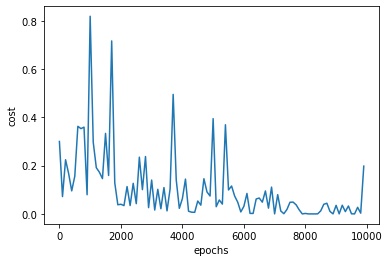

In [74]:
plt.xlabel("epochs")
plt.ylabel("cost")

plt.plot(epoch_list,cost_list)

https://www.ibm.com/topics/gradient-descent


https://youtu.be/IU5fuoYBTAM

def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost